In [3]:
import torch
from torch import nn


In [4]:
# device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [5]:
# create dummy data
weight: float = 0.7
bias: float = 0.3

x: torch.Tensor = torch.arange(start=0, end=1, step=0.02, device=device).unsqueeze(dim=1)
y: torch.Tensor = weight * x + bias

splitter = int(len(x) * 0.8)
x_train = x[:splitter]
y_train = y[:splitter]
x_test = x[splitter:]
y_test = y[splitter:]


In [6]:
class LinearRegressionModel(nn.Module):
	def __init__(self) -> None:
		super().__init__()

		# takes 1 feature, outputs 1 value
		self.linear_layer = nn.Linear(in_features=1, out_features=1)


	def forward(self, X: torch.Tensor) -> torch.Tensor:
		return self.linear_layer(X)


In [7]:
torch.manual_seed(42)

model = LinearRegressionModel()
model.to(device=device)

model.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [8]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)


In [9]:
epochs = 1000
for epoch in range(1, epochs+1):
	model.train()

	y_pred = model(x_train)

	loss = loss_fn(y_pred, y_train)

	optimizer.zero_grad()

	loss.backward()

	optimizer.step()


	model.eval()
	with torch.inference_mode():
		y_pred_test = model(x_test)
		test_loss = loss_fn(y_pred_test, y_test)

	lss = loss.item()
	tstlss = test_loss.item()
	print(f'{epoch = :0>3}\t{lss = :.3f}\t{tstlss = :.3f}') if not epoch%10 else ...


epoch = 010	lss = 0.543	tstlss = 0.569
epoch = 020	lss = 0.529	tstlss = 0.550
epoch = 030	lss = 0.515	tstlss = 0.531
epoch = 040	lss = 0.501	tstlss = 0.512
epoch = 050	lss = 0.487	tstlss = 0.493
epoch = 060	lss = 0.473	tstlss = 0.474
epoch = 070	lss = 0.459	tstlss = 0.455
epoch = 080	lss = 0.445	tstlss = 0.436
epoch = 090	lss = 0.431	tstlss = 0.417
epoch = 100	lss = 0.418	tstlss = 0.398
epoch = 110	lss = 0.404	tstlss = 0.380
epoch = 120	lss = 0.390	tstlss = 0.361
epoch = 130	lss = 0.376	tstlss = 0.342
epoch = 140	lss = 0.362	tstlss = 0.323
epoch = 150	lss = 0.348	tstlss = 0.304
epoch = 160	lss = 0.334	tstlss = 0.285
epoch = 170	lss = 0.320	tstlss = 0.266
epoch = 180	lss = 0.306	tstlss = 0.247
epoch = 190	lss = 0.292	tstlss = 0.228
epoch = 200	lss = 0.279	tstlss = 0.209
epoch = 210	lss = 0.265	tstlss = 0.191
epoch = 220	lss = 0.251	tstlss = 0.172
epoch = 230	lss = 0.237	tstlss = 0.153
epoch = 240	lss = 0.223	tstlss = 0.134
epoch = 250	lss = 0.209	tstlss = 0.115
epoch = 260	lss = 0.195	t

In [10]:
x = 12
model(torch.tensor([x]).type(torch.float32).to(device)).item()


8.689544677734375

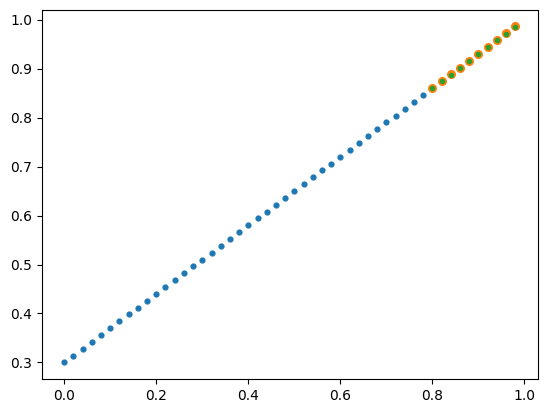

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x_train.cpu(), y_train.cpu(), s=12)
plt.scatter(x_test.cpu(), y_test.cpu(), s=30)
plt.scatter(x_test.cpu(), y_pred_test.cpu(), s=9)
